## Import Libraries

In [1]:
import numpy as np
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
!pip install torchsummary
from torchsummary import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install torchinfo
import torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
%cd /content/drive/MyDrive/ERA_V1/Session7/Assignment/to_submit/

/content/drive/MyDrive/ERA_V1/Session7/Assignment/to_submit


## Data Transformations

We first start with defining our data transformations.

In [6]:
# Train Phase transformations
train_transforms_1 = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms_1 = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

## Dataset and Creating Train/Test Split

In [7]:
train_1 = datasets.MNIST('./data', train=True, download=True, transform=train_transforms_1)
test_1 = datasets.MNIST('./data', train=False, download=True, transform=test_transforms_1)

## Dataloader Arguments & Test/Train Dataloaders

In [8]:
SEED = 11

# Check if CUDA is available
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


In [9]:
# dataloader arguments - something we'll fetch these from cmdprmt
dataloader_args_1 = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if use_cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader_1 = torch.utils.data.DataLoader(train_1, **dataloader_args_1)

# test dataloader
test_loader_1 = torch.utils.data.DataLoader(test_1, **dataloader_args_1)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


## Data Statistics

It is important to know your data very well. Let's check some of the statistics around our data and how it actually looks like

In [10]:
# Import the custom module "utils"
import utils
# Import specific components from the "utils" module
from utils import display_train_data, display_multiple_images, display_model_stats, show_image_by_index

In [11]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data_1 = train_1.train_data
train_data_1 = train_1.transform(train_data_1.numpy())

display_train_data(train_data_1)

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (28, 60000, 28)
 - Tensor Shape: torch.Size([28, 60000, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)


In [12]:
images1, labels1 = next(iter(train_loader_1))

print(images1.shape)
print(labels1.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


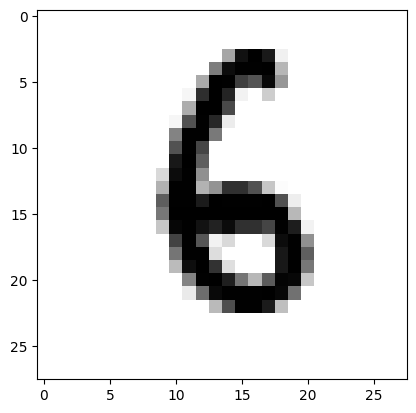

In [13]:
show_image_by_index(images1, 0)

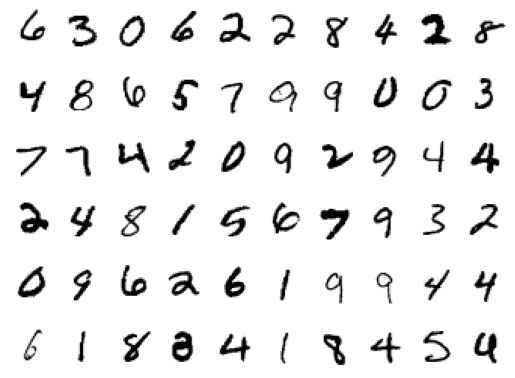

In [14]:
display_multiple_images(images1, 60)

#### It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

In [15]:
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [16]:
# Import "model" module and specific components from the "model" module
import model
from model import Model_5, Model_9, train, test

### Model-3 - Reduce Model Capacity

In [20]:
model5 = Model_5().to(device)
summary(model5, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
            Conv2d-3           [-1, 16, 24, 24]           1,152
              ReLU-4           [-1, 16, 24, 24]               0
            Conv2d-5           [-1, 10, 24, 24]             160
         MaxPool2d-6           [-1, 10, 12, 12]               0
            Conv2d-7           [-1, 14, 10, 10]           1,260
              ReLU-8           [-1, 14, 10, 10]               0
            Conv2d-9             [-1, 16, 8, 8]           2,016
             ReLU-10             [-1, 16, 8, 8]               0
           Conv2d-11              [-1, 8, 6, 6]           1,152
             ReLU-12              [-1, 8, 6, 6]               0
           Conv2d-13             [-1, 16, 6, 6]           1,152
             ReLU-14             [-1, 1

In [21]:
optimizer5 = optim.SGD(model5.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss5, train_acc5 = train(model5, device, train_loader_1, optimizer5, epoch)
    test_loss5, test_acc5 = test(model5, device, test_loader_1)

EPOCH: 0


Loss=2.3025214672088623 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:22<00:00, 20.42it/s]



Test set: Average loss: 2.3024, Accuracy: 980/10000 (9.80%)

EPOCH: 1


Loss=2.3042056560516357 Batch_id=468 Accuracy=9.87: 100%|██████████| 469/469 [00:18<00:00, 25.86it/s]



Test set: Average loss: 2.3008, Accuracy: 980/10000 (9.80%)

EPOCH: 2


Loss=0.2965541183948517 Batch_id=468 Accuracy=37.75: 100%|██████████| 469/469 [00:18<00:00, 25.20it/s]



Test set: Average loss: 0.4677, Accuracy: 8440/10000 (84.40%)

EPOCH: 3


Loss=0.3117922842502594 Batch_id=468 Accuracy=91.14: 100%|██████████| 469/469 [00:17<00:00, 27.10it/s]



Test set: Average loss: 0.1823, Accuracy: 9389/10000 (93.89%)

EPOCH: 4


Loss=0.09122548252344131 Batch_id=468 Accuracy=94.87: 100%|██████████| 469/469 [00:17<00:00, 27.01it/s]



Test set: Average loss: 0.1537, Accuracy: 9515/10000 (95.15%)

EPOCH: 5


Loss=0.20473825931549072 Batch_id=468 Accuracy=96.02: 100%|██████████| 469/469 [00:17<00:00, 26.30it/s]



Test set: Average loss: 0.0944, Accuracy: 9725/10000 (97.25%)

EPOCH: 6


Loss=0.09443636983633041 Batch_id=468 Accuracy=96.92: 100%|██████████| 469/469 [00:18<00:00, 25.45it/s]



Test set: Average loss: 0.0859, Accuracy: 9735/10000 (97.35%)

EPOCH: 7


Loss=0.07991895824670792 Batch_id=468 Accuracy=97.30: 100%|██████████| 469/469 [00:17<00:00, 26.59it/s]



Test set: Average loss: 0.1178, Accuracy: 9643/10000 (96.43%)

EPOCH: 8


Loss=0.31349313259124756 Batch_id=468 Accuracy=97.71: 100%|██████████| 469/469 [00:16<00:00, 27.84it/s]



Test set: Average loss: 0.0728, Accuracy: 9786/10000 (97.86%)

EPOCH: 9


Loss=0.043803635984659195 Batch_id=468 Accuracy=97.89: 100%|██████████| 469/469 [00:17<00:00, 26.46it/s]



Test set: Average loss: 0.0555, Accuracy: 9824/10000 (98.24%)

EPOCH: 10


Loss=0.018303461372852325 Batch_id=468 Accuracy=98.12: 100%|██████████| 469/469 [00:19<00:00, 24.08it/s]



Test set: Average loss: 0.0510, Accuracy: 9838/10000 (98.38%)

EPOCH: 11


Loss=0.10358109325170517 Batch_id=468 Accuracy=98.20: 100%|██████████| 469/469 [00:17<00:00, 27.42it/s]



Test set: Average loss: 0.0611, Accuracy: 9819/10000 (98.19%)

EPOCH: 12


Loss=0.0315769724547863 Batch_id=468 Accuracy=98.31: 100%|██████████| 469/469 [00:17<00:00, 26.43it/s]



Test set: Average loss: 0.0462, Accuracy: 9853/10000 (98.53%)

EPOCH: 13


Loss=0.05396653339266777 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:17<00:00, 26.80it/s]



Test set: Average loss: 0.0534, Accuracy: 9837/10000 (98.37%)

EPOCH: 14


Loss=0.04873739182949066 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:18<00:00, 25.00it/s]



Test set: Average loss: 0.0510, Accuracy: 9858/10000 (98.58%)



In [22]:
train_losses5 = [t.cpu().item() for t in train_loss5]

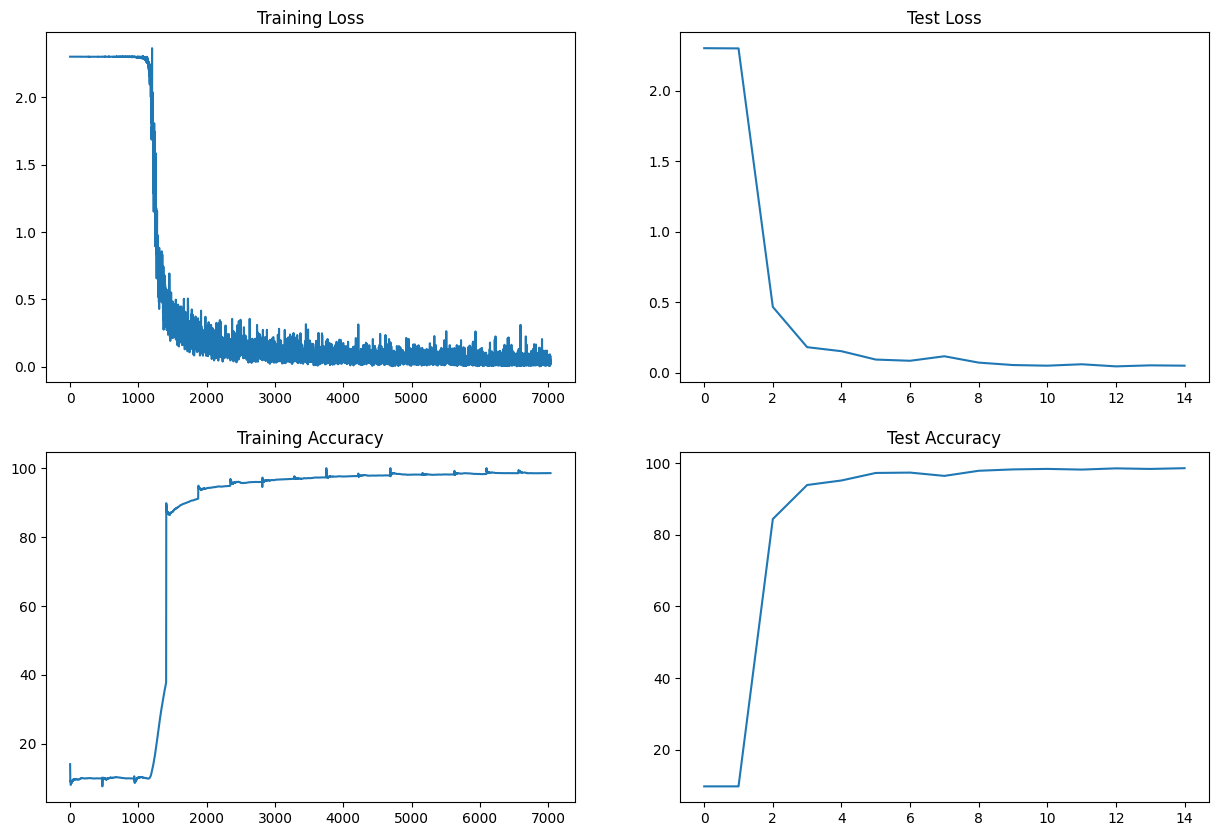

In [23]:
display_model_stats(train_losses5, train_acc5, test_loss5, test_acc5)

### Model-4 - Apply Batch Normalization and DropOut

In [17]:
model9 = Model_9().to(device)
summary(model9, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
            Conv2d-9           [-1, 10, 24, 24]             160
        MaxPool2d-10           [-1, 10, 12, 12]               0
           Conv2d-11           [-1, 14, 10, 10]           1,260
             ReLU-12           [-1, 14, 10, 10]               0
      BatchNorm2d-13           [-1, 14, 10, 10]              28
          Dropout-14           [-1, 14,

In [18]:
optimizer9 = optim.SGD(model9.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss9, train_acc9 = train(model9, device, train_loader_1, optimizer9, epoch)
    test_loss9, test_acc9 = test(model9, device, test_loader_1)

EPOCH: 0


Loss=0.07028473168611526 Batch_id=468 Accuracy=88.28: 100%|██████████| 469/469 [00:22<00:00, 20.92it/s]



Test set: Average loss: 0.1036, Accuracy: 9725/10000 (97.25%)

EPOCH: 1


Loss=0.08323604613542557 Batch_id=468 Accuracy=97.54: 100%|██████████| 469/469 [00:19<00:00, 23.52it/s]



Test set: Average loss: 0.0506, Accuracy: 9867/10000 (98.67%)

EPOCH: 2


Loss=0.01084327045828104 Batch_id=468 Accuracy=98.13: 100%|██████████| 469/469 [00:19<00:00, 23.82it/s]



Test set: Average loss: 0.0508, Accuracy: 9844/10000 (98.44%)

EPOCH: 3


Loss=0.13468094170093536 Batch_id=468 Accuracy=98.44: 100%|██████████| 469/469 [00:18<00:00, 25.15it/s]



Test set: Average loss: 0.0301, Accuracy: 9918/10000 (99.18%)

EPOCH: 4


Loss=0.04375164210796356 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:21<00:00, 22.14it/s]



Test set: Average loss: 0.0266, Accuracy: 9919/10000 (99.19%)

EPOCH: 5


Loss=0.05823520943522453 Batch_id=468 Accuracy=98.74: 100%|██████████| 469/469 [00:19<00:00, 23.78it/s]



Test set: Average loss: 0.0259, Accuracy: 9919/10000 (99.19%)

EPOCH: 6


Loss=0.014867618680000305 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:20<00:00, 22.91it/s]



Test set: Average loss: 0.0266, Accuracy: 9927/10000 (99.27%)

EPOCH: 7


Loss=0.005422560963779688 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:18<00:00, 24.90it/s]



Test set: Average loss: 0.0264, Accuracy: 9922/10000 (99.22%)

EPOCH: 8


Loss=0.15936978161334991 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:20<00:00, 23.18it/s]



Test set: Average loss: 0.0256, Accuracy: 9924/10000 (99.24%)

EPOCH: 9


Loss=0.009430959820747375 Batch_id=468 Accuracy=99.04: 100%|██████████| 469/469 [00:20<00:00, 22.63it/s]



Test set: Average loss: 0.0226, Accuracy: 9934/10000 (99.34%)

EPOCH: 10


Loss=0.02286091446876526 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:18<00:00, 24.73it/s]



Test set: Average loss: 0.0275, Accuracy: 9913/10000 (99.13%)

EPOCH: 11


Loss=0.06318174302577972 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:18<00:00, 25.69it/s]



Test set: Average loss: 0.0228, Accuracy: 9928/10000 (99.28%)

EPOCH: 12


Loss=0.005998706910759211 Batch_id=468 Accuracy=99.12: 100%|██████████| 469/469 [00:18<00:00, 25.77it/s]



Test set: Average loss: 0.0224, Accuracy: 9932/10000 (99.32%)

EPOCH: 13


Loss=0.03143547847867012 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:18<00:00, 24.79it/s]



Test set: Average loss: 0.0225, Accuracy: 9930/10000 (99.30%)

EPOCH: 14


Loss=0.013292047195136547 Batch_id=468 Accuracy=99.18: 100%|██████████| 469/469 [00:18<00:00, 25.24it/s]



Test set: Average loss: 0.0218, Accuracy: 9938/10000 (99.38%)



In [19]:
train_losses9 = [t.cpu().item() for t in train_loss9]

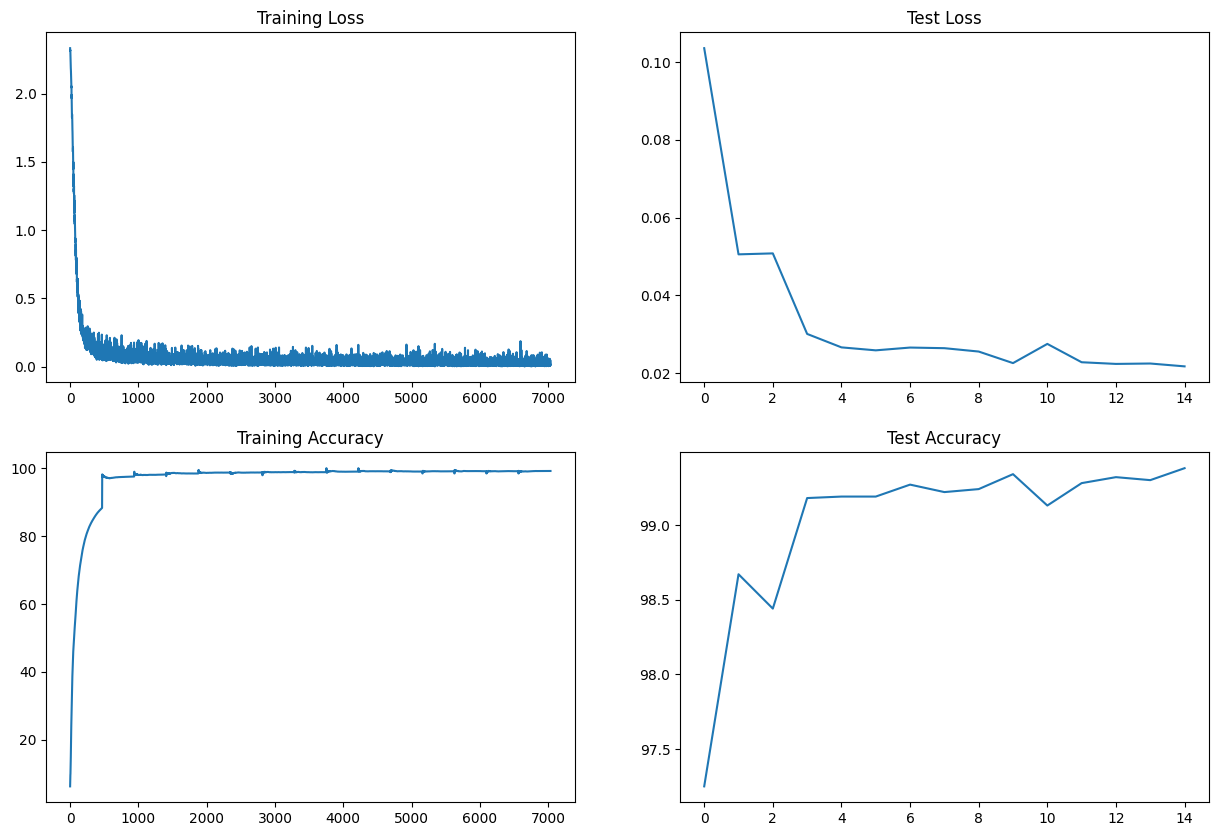

In [20]:
display_model_stats(train_losses9, train_acc9, test_loss9, test_acc9)

#### Code Block - Reduce Model Capacity

**Target:**

- Make the model lighter

**Results:**

- Parameters: 7.124K
- Best Train Accuracy: 98.57%
- Best Test Accuracy: 98.58%

**Analysis:**
- Good model. Since we have reduced model capacity, a reduction in performance is seen as expected.
- No over-fitting, model seems capable of performing better if pushed further

#### Code Block - Batch Normalization and DropOut


**Target:**

- Add Batch-norm to increase model efficiency.
- Add Regularization, Dropout

**Results:**

- Parameters: 7.280K
- Best Train Accuracy: 99.18%
- Best Test Accuracy: 99.38%

**Analysis:**
- We have started to see over-fitting now, as we find the accuracies fluctuating
- Even if the model is pushed further, it won't be able to get to 99.4
- Regularization is working.
- Need to push the model further to perform better.